In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

Loading dataset...
Dataset loaded successfully!
Shape: (6607, 20)

First 5 rows:
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Int

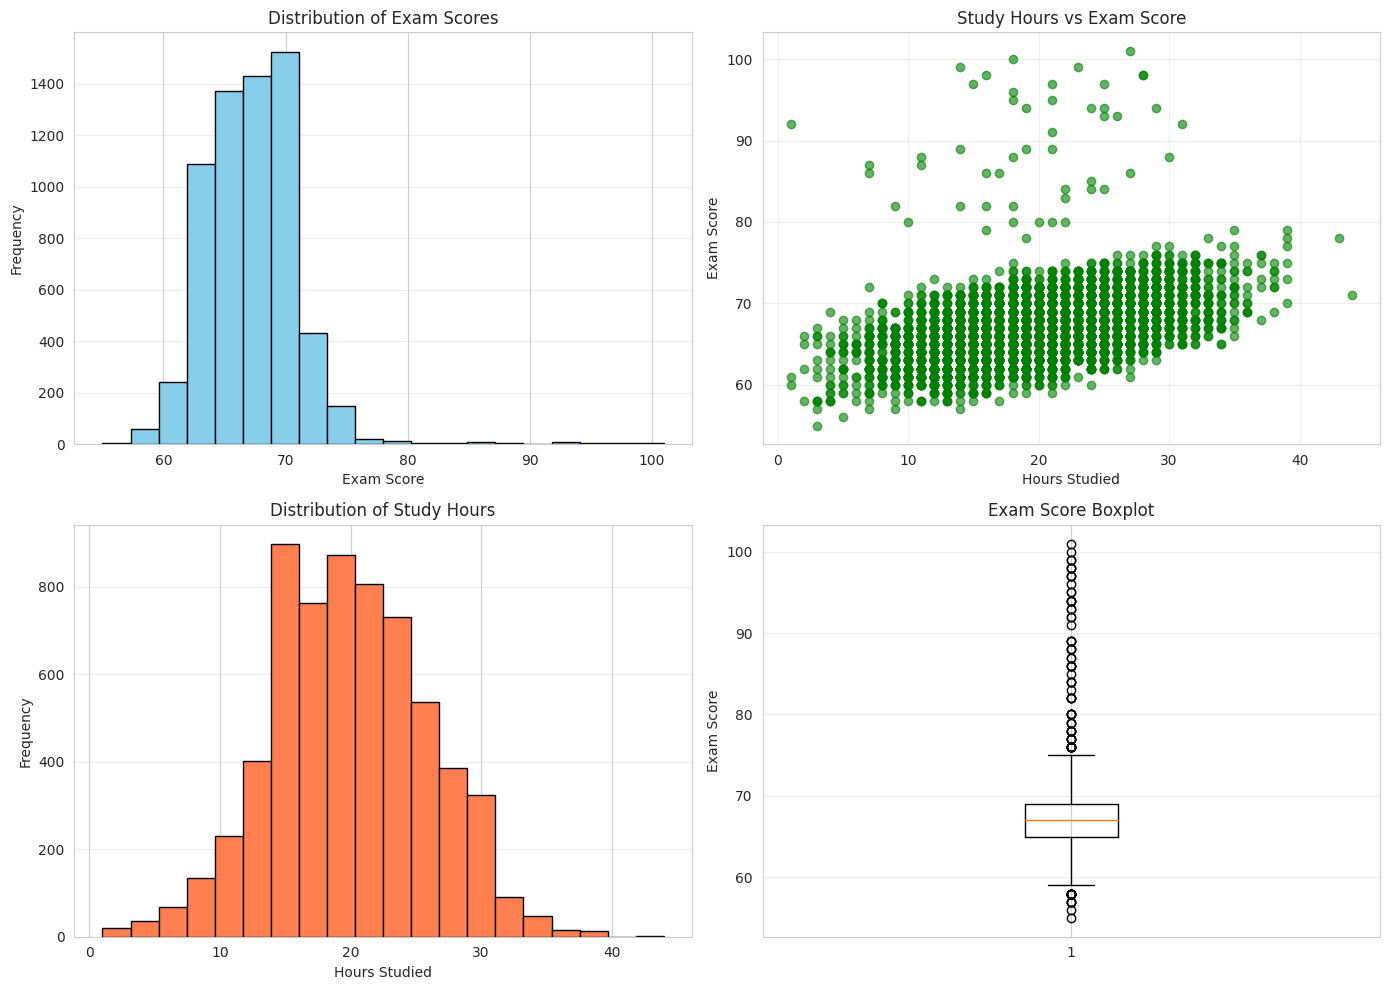


Visualization completed!


In [18]:
# ============================================================================
# 1. LOAD THE DATASET
# ============================================================================
print("Loading dataset...")
df = pd.read_csv('/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst 5 rows:")
print(df.head())

# ============================================================================
# 2. DATA CLEANING
# ============================================================================
print("\n" + "="*60)
print("DATA CLEANING")
print("="*60)

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Handle missing values if any
if df.isnull().sum().sum() > 0:
    print("\nDropping rows with missing values...")
    df = df.dropna()
    print(f"Dataset shape after cleaning: {df.shape}")
else:
    print("\nNo missing values found!")

# Display basic statistics
print("\nDataset Statistics:")
print(df.describe())

# ============================================================================
# 3. BASIC VISUALIZATION
# ============================================================================
print("\n" + "="*60)
print("DATA VISUALIZATION")
print("="*60)

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Distribution of Exam Scores
axes[0, 0].hist(df['Exam_Score'], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Exam Score')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Exam Scores')
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Study Hours vs Exam Score
axes[0, 1].scatter(df['Hours_Studied'], df['Exam_Score'], alpha=0.6, color='green')
axes[0, 1].set_xlabel('Hours Studied')
axes[0, 1].set_ylabel('Exam Score')
axes[0, 1].set_title('Study Hours vs Exam Score')
axes[0, 1].grid(alpha=0.3)

# 3. Distribution of Study Hours
axes[1, 0].hist(df['Hours_Studied'], bins=20, color='coral', edgecolor='black')
axes[1, 0].set_xlabel('Hours Studied')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Study Hours')
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Boxplot of Exam Scores
axes[1, 1].boxplot(df['Exam_Score'], vert=True)
axes[1, 1].set_ylabel('Exam Score')
axes[1, 1].set_title('Exam Score Boxplot')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('data_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualization completed!")


SPLITTING DATASET
Training set size: 5102 samples
Testing set size: 1276 samples
Train/Test split: 80/20

TRAINING LINEAR REGRESSION MODEL
Model trained successfully!

Model Parameters:
Coefficient (slope): 0.2883
Intercept: 61.4900

Equation: Exam Score = 61.4900 + 0.2883 * Hours Studied

MAKING PREDICTIONS
Predictions completed!

MODEL PERFORMANCE EVALUATION

Training Set Performance:
R² Score: 0.1963
RMSE: 3.5024
MAE: 2.5098

Testing Set Performance:
R² Score: 0.2051
RMSE: 3.5145
MAE: 2.5292

VISUALIZING PREDICTIONS


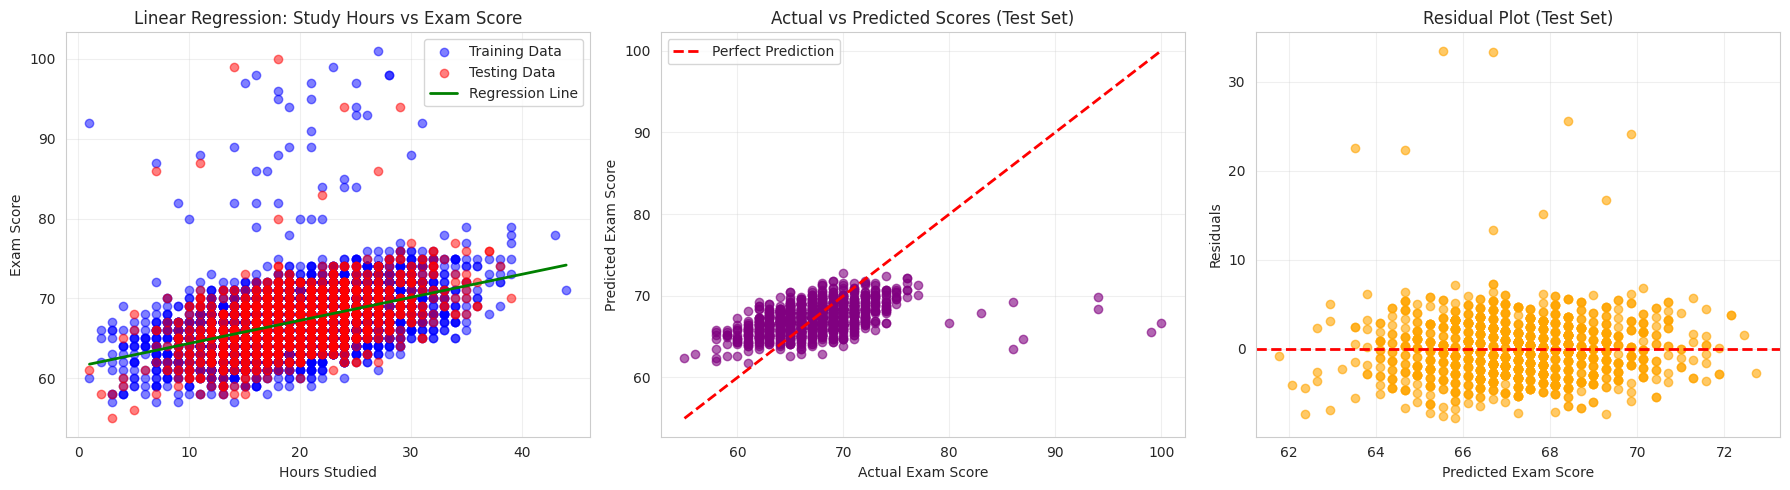


Visualization completed!


In [19]:
# ============================================================================
# 4. SPLIT DATASET INTO TRAINING AND TESTING SETS
# ============================================================================
print("\n" + "="*60)
print("SPLITTING DATASET")
print("="*60)

# Prepare features (X) and target (y)
X = df[['Hours_Studied']]  # Feature: Study Hours
y = df['Exam_Score']        # Target: Exam Score

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")
print(f"Train/Test split: 80/20")

# ============================================================================
# 5. TRAIN LINEAR REGRESSION MODEL
# ============================================================================
print("\n" + "="*60)
print("TRAINING LINEAR REGRESSION MODEL")
print("="*60)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully!")
print(f"\nModel Parameters:")
print(f"Coefficient (slope): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"\nEquation: Exam Score = {model.intercept_:.4f} + {model.coef_[0]:.4f} * Hours Studied")

# ============================================================================
# 6. MAKE PREDICTIONS
# ============================================================================
print("\n" + "="*60)
print("MAKING PREDICTIONS")
print("="*60)

# Make predictions on training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Predictions completed!")

# ============================================================================
# 7. EVALUATE MODEL PERFORMANCE
# ============================================================================
print("\n" + "="*60)
print("MODEL PERFORMANCE EVALUATION")
print("="*60)

# Calculate metrics for training set
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)

# Calculate metrics for testing set
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)

print("\nTraining Set Performance:")
print(f"R² Score: {train_r2:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAE: {train_mae:.4f}")

print("\nTesting Set Performance:")
print(f"R² Score: {test_r2:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAE: {test_mae:.4f}")

# ============================================================================
# 8. VISUALIZE PREDICTIONS
# ============================================================================
print("\n" + "="*60)
print("VISUALIZING PREDICTIONS")
print("="*60)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Regression Line with Training and Test Data
axes[0].scatter(X_train, y_train, alpha=0.5, color='blue', label='Training Data')
axes[0].scatter(X_test, y_test, alpha=0.5, color='red', label='Testing Data')
# Plot regression line
x_line = np.linspace(X_train.min(), X_train.max(), 100)
y_line = model.predict(x_line.reshape(-1, 1))
axes[0].plot(x_line, y_line, color='green', linewidth=2, label='Regression Line')
axes[0].set_xlabel('Hours Studied')
axes[0].set_ylabel('Exam Score')
axes[0].set_title('Linear Regression: Study Hours vs Exam Score')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot 2: Actual vs Predicted (Testing Set)
axes[1].scatter(y_test, y_test_pred, alpha=0.6, color='purple')
# Perfect prediction line
axes[1].plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], 
             'r--', linewidth=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Exam Score')
axes[1].set_ylabel('Predicted Exam Score')
axes[1].set_title('Actual vs Predicted Scores (Test Set)')
axes[1].legend()
axes[1].grid(alpha=0.3)

# Plot 3: Residuals Plot
residuals = y_test - y_test_pred
axes[2].scatter(y_test_pred, residuals, alpha=0.6, color='orange')
axes[2].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[2].set_xlabel('Predicted Exam Score')
axes[2].set_ylabel('Residuals')
axes[2].set_title('Residual Plot (Test Set)')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('model_predictions.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualization completed!")


In [20]:
# ============================================================================
# 9. SAMPLE PREDICTIONS
# ============================================================================
print("\n" + "="*60)
print("SAMPLE PREDICTIONS (First 10 Test Samples)")
print("="*60)

# Create a comparison dataframe
comparison = pd.DataFrame({
    'Hours Studied': X_test.values.flatten()[:10],
    'Actual Score': y_test.values[:10],
    'Predicted Score': y_test_pred[:10],
    'Difference': y_test.values[:10] - y_test_pred[:10]
})

print(comparison.to_string(index=False))


SAMPLE PREDICTIONS (First 10 Test Samples)
 Hours Studied  Actual Score  Predicted Score  Difference
            31            74        70.428618    3.571382
            13            66        65.238450    0.761550
            27            70        69.275248    0.724752
            20            72        67.256849    4.743151
            17            67        66.391820    0.608180
            24            69        68.410219    0.589781
            17            72        66.391820    5.608180
            15            66        65.815135    0.184865
            19            69        66.968506    2.031494
            25            68        68.698562   -0.698562


In [21]:
# ============================================================================
# 10. SAVE THE MODEL
# ============================================================================
print("\n" + "="*60)
print("SAVING MODEL")
print("="*60)

import pickle
import joblib

# Method 1: Save using pickle
with open('student_performance_model.pkl', 'wb') as file:
    pickle.dump(model, file)
print("✓ Model saved as 'student_performance_model.pkl' (pickle)")

# Method 2: Save using joblib (recommended for sklearn models)
joblib.dump(model, 'student_performance_model.joblib')
print("✓ Model saved as 'student_performance_model.joblib' (joblib)")

# Save model parameters and metrics for reference
model_info = {
    'coefficient': model.coef_[0],
    'intercept': model.intercept_,
    'test_r2': test_r2,
    'test_rmse': test_rmse,
    'test_mae': test_mae,
    'training_samples': len(X_train),
    'testing_samples': len(X_test)
}

with open('model_info.pkl', 'wb') as file:
    pickle.dump(model_info, file)
print("✓ Model information saved as 'model_info.pkl'")


SAVING MODEL
✓ Model saved as 'student_performance_model.pkl' (pickle)
✓ Model saved as 'student_performance_model.joblib' (joblib)
✓ Model information saved as 'model_info.pkl'
